In [25]:
import argparse
import src.utility
from time import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# utility
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [28]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 

In [29]:
import pyLDAvis
import pyLDAvis.gensim
from gensim.models.wrappers import ldamallet
pyLDAvis.enable_notebook()

In [5]:
topics = [2+x*6 for x in xrange(17)]

In [9]:
coherence_list = []
for topic in topics:
    pkl_file = open('./output/mallet_optimal_gensim_'+str(topic)+".pkl", 'rb')
    [model, coherence] = pickle.load(pkl_file)
    coherence_list.append(coherence)
    pkl_file.close()

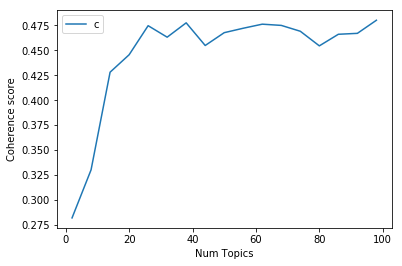

In [13]:
limit = 100
start = 2
step = 6
x = range(start, limit, step)
plt.plot(x, coherence_list)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [26]:
pkl_file = open('./output/mallet_optimal_gensim_26.pkl', 'rb')
[model, coherence] = pickle.load(pkl_file)
pkl_file.close()

In [8]:
corpus = list(corpora.MmCorpus("./output/lda_corpus.mm"))
id2word = corpora.Dictionary.load("./output/lda_dict.pkl")

In [6]:
lda_model2 = ldamallet.malletmodel2ldamodel(model)
vis = pyLDAvis.gensim.prepare(lda_model2, corpus, id2word)

/home/momen/virtualenv/cs6724/local/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [7]:
vis

PreparedData(topic_coordinates=           Freq  cluster  topics         x             y
topic                                                   
6      3.961607        1       1  0.000182  8.461269e-04
12     3.922792        1       2  0.000033 -1.268411e-04
15     3.898258        1       3  0.000677 -2.615028e-04
0      3.871061        1       4 -0.000035  3.479718e-04
4      3.868465        1       5  0.000344  2.292082e-04
16     3.857672        1       6 -0.000136 -4.569374e-07
17     3.855839        1       7  0.000219 -9.023659e-05
21     3.855539        1       8 -0.000715  1.183477e-04
13     3.848495        1       9  0.000130 -4.172572e-04
5      3.847818        1      10 -0.000119  1.022549e-04
11     3.847343        1      11  0.000060  4.849836e-04
24     3.844372        1      12 -0.000020  1.082999e-04
23     3.843821        1      13 -0.000185 -4.626401e-04
9      3.840670        1      14  0.000097 -4.276222e-04
20     3.837693        1      15 -0.000208 -3.443346e-04
18     3.836414        1      16 -0.000398  4.401642e-04
14     3.833179        1      17 -0.000192  4.309012e-04
19     3.832750        1      18  0.000121 -4.058370e-04
10     3.831565        1      19  0.000145 -7.543371e-05
2      3.831436        1      20  0.000234  2.379592e-04
3      3.830056        1      21 -0.000127  3.061789e-05
1      3.829039        1      22 -0.000419 -1.303586e-04
8      3.828808        1      23 -0.000311 -2.574729e-04
22     3.825925        1      24  0.000378 -3.024984e-04
25     3.822183        1      25  0.000738  1.606265e-04
7      3.697199        1      26 -0.000496 -2.349699e-04, topic_info=      Category         Freq                     Term        Total  loglift  \
term                                                                         
88118  Default  2160.000000         mysteriously_die  2160.000000  30.0000   
60545  Default  2248.000000               got_buried  2248.000000  29.0000   
37603  Default  2173.000000                 poor_kid  2173.000000  28.0000   
95256  Default  2211.000000            comfort_women  2211.000000  27.0000   
72434  Default  2134.000000           justice_scalia  2134.000000  26.0000   
15594  Default  2153.000000            suspects_keep  2153.000000  25.0000   
16685  Default  2213.000000          federal_reserve  2213.000000  24.0000   
24564  Default  2167.000000                      fur  2167.000000  23.0000   
90694  Default  2199.000000           european_hotel  2199.000000  22.0000   
45051  Default  2207.000000                       pu  2207.000000  21.0000   
38637  Default  2167.000000           investor_worry  2167.000000  20.0000   
59172  Default  2156.000000          sacred_geometry  2156.000000  19.0000   
60128  Default  2108.000000          fabricating_lie  2108.000000  18.0000   
7997   Default  2251.000000                   cowley  2251.000000  17.0000   
4445   Default  2216.000000            poorest_fifth  2216.000000  16.0000   
32889  Default  2175.000000                grave_gun  2175.000000  15.0000   
83252  Default  2146.000000  disinformation_campaign  2146.000000  14.0000   
44209  Default  2139.000000      projected_electoral  2139.000000  13.0000   
75443  Default  2186.000000       chocolate_currency  2186.000000  12.0000   
52763  Default  2210.000000              marc_riboud  2210.000000  11.0000   
56900  Default  2177.000000               sabes_usar  2177.000000  10.0000   
31389  Default  2191.000000         museums_librarie  2191.000000   9.0000   
81598  Default  2154.000000               hsbc_issue  2154.000000   8.0000   
66727  Default  2152.000000             belmont_high  2152.000000   7.0000   
92766  Default  2183.000000                  mankind  2183.000000   6.0000   
40646  Default  2290.000000                 party_ku  2290.000000   5.0000   
43661  Default  2183.000000      industrial_strategy  2183.000000   4.0000   
29651  Default  2170.000000        weeklong_oklahoma  2170.000000   3.0000   
2865   Default  2184.

In [7]:
pkl_file = open('./output/infer_gensim_26_ldamodel.pkl', 'rb')
[model_infer] = pickle.load(pkl_file)
pkl_file.close()

In [9]:
corpus = np.asarray(corpus)

In [10]:
dataframe = pd.read_csv('output/dataframe_lem.csv', sep='\t', index_col=0)
print "done loading dataframe ..."
msk = np.load('output/mask.npy')

/home/momen/virtualenv/cs6724/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


done loading dataframe ...


In [11]:
doc_topics = model_infer.get_document_topics(corpus)

In [12]:
print doc_topics[0]

[(0, 0.037131585930367), (1, 0.03608141108711925), (2, 0.03561253561253563), (3, 0.03563190675423214), (4, 0.03561253561253563), (5, 0.03561253561253563), (6, 0.03561253561253563), (7, 0.03561253561253563), (8, 0.03561253561253563), (9, 0.037332901960891805), (10, 0.03561253561253563), (11, 0.03561388153374809), (12, 0.03561253561253563), (13, 0.046319226661800016), (14, 0.03561253561253563), (15, 0.041233538473092766), (16, 0.03561253561253563), (17, 0.03561253561253563), (18, 0.03561253561253563), (19, 0.03589378536857153), (20, 0.03561253561253563), (21, 0.03561253561253563), (22, 0.03561253561253563), (23, 0.03561253561253563), (24, 0.08934865681707214), (25, 0.03561253561253563)]


In [14]:
for i in xrange(len(doc_topics[0])):
    dataframe["topic_"+str(i)]=0.0

In [18]:
y_pred = dataframe[msk]["category"]

In [19]:
array = np.asmatrix(doc_topics)

KeyboardInterrupt: 

In [20]:
doc_topics2 = list(doc_topics)

In [24]:
doc_topics_mat = np.asarray(doc_topics2)

In [23]:
doc_topics_mat[0]

matrix([[list([(0, 0.037131718444264404), (1, 0.036081226183215534), (2, 0.035612535612535634), (3, 0.035631907266943985), (4, 0.035612535612535634), (5, 0.035612535612535634), (6, 0.035612535612535634), (7, 0.035612535612535634), (8, 0.035612535612535634), (9, 0.037331934515908896), (10, 0.035612535612535634), (11, 0.03561388105092934), (12, 0.035612535612535634), (13, 0.04633009519171901), (14, 0.035612535612535634), (15, 0.04122382284363298), (16, 0.035612535612535634), (17, 0.035612535612535634), (18, 0.035612535612535634), (19, 0.035893794443645), (20, 0.035612535612535634), (21, 0.035612535612535634), (22, 0.035612535612535634), (23, 0.035612535612535634), (24, 0.08934851464663565), (25, 0.035612535612535634)]),
         list([(0, 0.036982248520710075), (1, 0.036982248520710075), (2, 0.036982248520710075), (3, 0.036982248520710075), (4, 0.036982248520710075), (5, 0.036983447785241354), (6, 0.036982248520710075), (7, 0.036982248520710075), (8, 0.036982248520710075), (9, 0.03698224

In [27]:
model.get_topics()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00012629, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00040014, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
lda_model2 = ldamallet.malletmodel2ldamodel(model)

In [36]:
model.show_topics(formatted=False)

[(14,
  [(u'woman', 0.08072812678046726),
   (u'day', 0.06805242897386636),
   (u'post', 0.05640479310663166),
   (u'big', 0.054562530146741915),
   (u'anti', 0.0516199623189625),
   (u'washington', 0.04127638642237176),
   (u'protest', 0.037401625342983205),
   (u'fire', 0.03019139869411006),
   (u'inauguration', 0.024293016225570556),
   (u'history', 0.02427731124110893)]),
 (5,
  [(u'election', 0.09394467518308416),
   (u'vote', 0.07770723727230802),
   (u'voter', 0.03519105793707554),
   (u'lose', 0.03321745639296144),
   (u'win', 0.028155167757480906),
   (u'html', 0.027506928120171185),
   (u'brexit', 0.021705568018126415),
   (u'independent', 0.018541030275881772),
   (u'fraud', 0.01776173906917215),
   (u'college', 0.01547191319230421)]),
 (7,
  [(u'nan', 0.3124961866037816),
   (u'world', 0.0721168404919274),
   (u'china', 0.04970841050335143),
   (u'power', 0.020853126675609814),
   (u'country', 0.020820510715327055),
   (u'list', 0.01765844960032796),
   (u'top', 0.016125077

In [35]:
model_topics

[(2,
  [(u'la', 0.04872525712619071),
   (u'los', 0.025261658784988837),
   (u'por', 0.02329096561994394),
   (u'ocid', 0.02227001518090635),
   (u'mundo', 0.01847051875869979),
   (u'bbc', 0.01564020923506231),
   (u'para', 0.015426717475515779),
   (u'st', 0.013733497908109205),
   (u'con', 0.010821995826071877),
   (u'qu', 0.01039343575244678)]),
 (8,
  [(u'state', 0.09795185847080252),
   (u'today', 0.0493550645622526),
   (u'usa', 0.037962315954808826),
   (u'change', 0.03389585252886286),
   (u'california', 0.02013704663337037),
   (u'press', 0.020105165736005556),
   (u'pick', 0.01865513457655091),
   (u'secretary', 0.017998415574368033),
   (u'head', 0.017216646500624908),
   (u'major', 0.01667961828122112)]),
 (14,
  [(u'woman', 0.08072812678046726),
   (u'day', 0.06805242897386636),
   (u'post', 0.05640479310663166),
   (u'big', 0.054562530146741915),
   (u'anti', 0.0516199623189625),
   (u'washington', 0.04127638642237176),
   (u'protest', 0.037401625342983205),
   (u'fire',

In [38]:
dataframe.iloc[1]["clean_text_lem"]

'slate trump administration benign_neglect iwtlopudk'

NameError: name 'lda_model' is not defined